#**PDF PASSWORD FINDER**

## Steps to retrieve PDF Password
***Steps to retrieve PDF Password***

>Install and Import Required Libraries

>>To install the necessary libraries, click on the "RESTART SESSION" button. This action will prompt a restart with the required libraries.

>Generate a Password Word List

>>Specify the minimum and maximum password length.

>>Choose from password character options: UPPERCASE, lowercase, digits & symbols.

>>Optionally select specific characters for password generation.


>>>For instance, if your password contains the combination "ABcd123," insert this combination to generate the password word list.

>Upload PDF File to Colab

>>Navigate to the file section and upload the PDF file.

>>After uploading, right-click on the file and select "Copy path" to copy the file path.

>>Paste the copied file path into the designated pdf_file area.

>Run the PDF Password Finding Section

>>Execute the PDF password finding section to retrieve the password.

.

Note: This process involves attempting to open the PDF with various
combinations of passwords from the generated wordlist. Please be aware that complex passwords may require more time to retrieve.
_______________________________________________________________________________
________________________________________________
_______________________________________


## STEP 1: Installing Libraries

In [ ]:
!pip install tqdm

In [ ]:
!pip install pikepdf colorama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


## STEP 2: Import Libraries

In [ ]:
import itertools
import string
from tqdm import tqdm
import pikepdf
from colorama import Fore, Style
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## STEP3: Generate Pass-Word list

In [ ]:


def generate_wordlist(min_length, max_length, include_uppercase=True, include_lowercase=True, include_digits=True, include_special_characters=False, user_defined_characters=None):
    # Define characters to include
    characters = ''
    if include_uppercase:
        characters += string.ascii_uppercase
    if include_lowercase:
        characters += string.ascii_lowercase
    if include_digits:
        characters += string.digits
    if include_special_characters:
        characters += "!@#$%^&*()_+={}[]|:;<>,.?/~"
    if user_defined_characters_only:
        characters = user_defined_characters

    # Generate all combinations of characters within the specified length range
    words = []
    total_combinations = sum(len(characters) ** length for length in range(min_length, max_length + 1))
    with tqdm(total=total_combinations) as pbar:
        for length in range(min_length, max_length + 1):
            combinations = itertools.product(characters, repeat=length)
            for combination in combinations:
                word = ''.join(combination)
                words.append(word)
                pbar.update(1)

    # Save words to a text file
    with open('passwordlist.txt', 'w') as f:
        for word in words:
            f.write(word + '\n')

    print("Password-list generated successfully!")
    return words

#@markdown ---
#@markdown ### Password list Generator
#@markdown Specify the Password parameters below and Run this section to generate the password list.
min_length = 4 #@param {type:"integer"}
max_length = 4 #@param {type:"integer"}
include_uppercase = True #@param {type:"boolean"}
include_lowercase = True #@param {type:"boolean"}
include_digits = True #@param {type:"boolean"}
include_special_characters = False #@param {type:"boolean"}
user_defined_characters_only = False #@param {type:"boolean"}
user_defined_characters = "" #@param {type:"string"}

if user_defined_characters_only:
    include_uppercase = include_lowercase = include_digits = include_special_characters = False

# Generate wordlist
generated_words = generate_wordlist(min_length, max_length, include_uppercase, include_lowercase, include_digits, include_special_characters, user_defined_characters)

# Print total number of generated words
print("Total number of generated passwords:", len(generated_words))
wordlist_file = "passwordlist.txt"
#@markdown ---


100%|██████████| 14776336/14776336 [00:10<00:00, 1445193.53it/s]


Password-list generated successfully!
Total number of generated passwords: 14776336


## STEP 4: Specify PDF file path

In [ ]:
#@markdown ---
#@markdown # PDF file path
#@markdown ## Upload the Password protected pdf file to google colab.
#@markdown ## .
#@markdown After uploading, Specify the pdf file path:

pdf_file = "/content/AA1B.pdf" #@param {type:"string"}

# Path to the wordlist
wordlist_file = "passwordlist.txt"

# Print total number of generated words
print("PDF File received for unlock:", pdf_file)
#@markdown ---

PDF File received for unlock: /content/AA1B.pdf


## STEP 5: Retrieve the PDF Password

Password found: AA1B (Tried 3288 passwords)

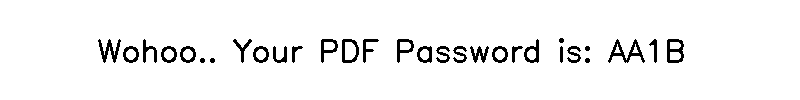

In [ ]:

#@markdown ---
#@markdown # Password Retrieving.
#@markdown Run this section to find the password.
#@markdown ---


# Function to attempt to open the PDF with a password
def try_password(pdf_file, password, count):
    try:
        with pikepdf.open(pdf_file, password=password) as pdf:
            global text
            print(Fore.GREEN + f"\rPassword found: {password} (Tried {count} passwords)" + Style.RESET_ALL, end="")
            text = f"Wohoo.. Your PDF Password is: {password} "
            return True
    except pikepdf.PasswordError:
        print(Fore.RED + f"\rIncorrect password: {password} (Tried {count} passwords)" + Style.RESET_ALL, end="")
        text = "Sorry,Retry with different password list "
        return False

# Initialize password count
count = 0

# Open the wordlist file
with open(wordlist_file, 'r') as f:
    # Iterate through each word in the wordlist
    for word in f:
        # Remove newline character
        word = word.strip()
        # Increment password count
        count += 1
        # Try to open the PDF with the current word as password
        if try_password(pdf_file, word, count):
            break  # Stop if password is found


#Password Show
# Set text properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 2
background_color = (255, 255, 255)  # White
text_color = (0, 0, 0)  # Black

# Create a blank image with the desired background color
image_width = 800
image_height = 100
image = 255 * np.ones((image_height, image_width, 3), dtype=np.uint8)
image[:] = background_color

# Get text size and position
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_x = (image_width - text_size[0]) // 2
text_y = (image_height + text_size[1]) // 2

# Add text to the image
cv2.putText(image, text, (text_x, text_y), font, font_scale, text_color, font_thickness)

# Display the image
cv2_imshow(image)